# VAE: Creating new handwritten numbers based on MNIST

## Imports

In [1]:
from dataset import Dataset
from nn import MLP
from vae import VAE, Sampler
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(3)

## Theory

The main motivation behind variational autoencoders is to construct a generator that produces new meaningful data from scratch. So how does it work? Simply put, it takes the structure of an autoencoder, i.e. it takes an input x, computes a lower dimensional representation of x which can then be reconstructed to an outuput that is very similar to x and additionally the lower dimensional representation of the whole dataset is well organized such that the different classes of the data are concentrated in distinct heap points. This ensures that when trying to generate new data one can just sample in the region of those heap points in the lower dimensional space and use the decoder to transform the samples to the shape of our data. Similar samples in the lower dimensional space should result in the same class of data which means that our new synthetic data is meaningful and not just random noise. 
Thus a variational autoencoder satisfies two main conditions: the autoencoder property and an organized lower dimensional space. Those aspects can be directly observed in the Loss function:

<center>$C\|x - \hat x\| + D_{KL}\Big(\mathcal{N}(g(x),h(x)),\mathcal{N}(0,I)\Big)$ </center>

Here the first term calculates the error for input and output pairs and thus ensures the autoencoder property. The second term is composed of the Kullback-Leibler divergence of two normal distributions which means some sort of distance or error is calculated for those two. Hence it is ensured that the lower dimensional space follows a multivariate standard normal distirbution and is thus well organized.

## Demo

Firstly we load our pre-trained variational autoencoder model:

In [2]:
#load model
vae = VAE()
vae.load("mnist_variational_autoencoder")
print(vae)

-------------------- VARIATIONAL AUTOENCODER (VAE) --------------------

TOTAL PARAMETERS = 427344 

###############
#   ENCODER   #
###############

 *** 1. Layer: *** 
------------------------
DENSE 784 -> 256 [ReLU]
------------------------
Total parameters: 200960 
---> WEIGHTS: (256, 784)
---> BIASES: (256,)
------------------------

###############
#   SAMPLER   #
###############

 *** MEAN Layer: *** 
---------------------------
DENSE 256 -> 32 [Identity]
---------------------------
Total parameters: 8224 
---> WEIGHTS: (32, 256)
---> BIASES: (32,)
---------------------------

 *** LOG_VAR Layer: *** 
---------------------------
DENSE 256 -> 32 [Identity]
---------------------------
Total parameters: 8224 
---> WEIGHTS: (32, 256)
---> BIASES: (32,)
---------------------------

###############
#   DECODER   #
###############

 *** 1. Layer: *** 
-----------------------
DENSE 32 -> 256 [ReLU]
-----------------------
Total parameters: 8448 
---> WEIGHTS: (256, 32)
---> BIASES: (256

Next we load our MNIST dataset

In [3]:
#load dataset
dataset = Dataset(name = "mnist", train_size = 60000, test_size = 10000, batch_size = 1)
original = next(dataset.batches())[1][0] #load a random handwritten image
output = vae.feedforward(original)

Here we can see, what a forward pass through our model does. It looks quite similar to what we'd expect form a normal Autoencoder.

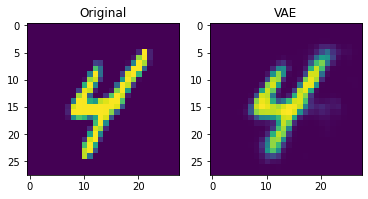

In [4]:
#example of feedforward pass
f, ax = plt.subplots(1,2)
ax[0].imshow(original.reshape(28,28))
ax[0].set_title("Original")
ax[1].imshow(output.reshape(28,28))
ax[1].set_title("VAE")
plt.show()

Here we can observe, what VAEs are all about. We extrapolate from "new" objects in our latent space an image, which is simmilar to it's two parent images. Thereby we can create new digit-like images.

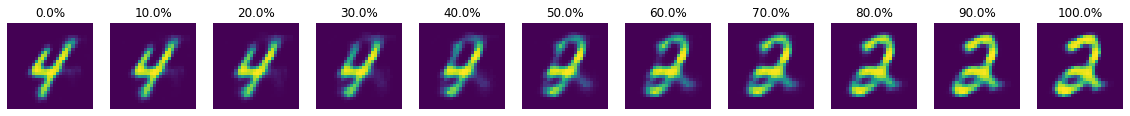

In [5]:
#extrapolating from latent space:
n = 11

latent1 = vae.sampler.sample
vae.feedforward(next(dataset.batches())[1][0])
latent2 = vae.sampler.sample


f, ax = plt.subplots(1, n, figsize = (20,20))

for i in range(n):
    z = (latent1 * (n-1-i) + latent2 * i) / (n-1)
    ax[i].imshow(vae.decoder.feedforward(z).reshape(28,28))
    ax[i].set_title(f"{i/(n-1) * 100}%")
    ax[i].axis("off")

plt.show()

## References

1. Diederik P Kingma and Max Welling. Auto-Encoding Variational Bayes. 2013. arXiv: 1312.6114 [stat.ML]

2. https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

3. https://github.com/pometa0507/Variational-Autoencoder-Numpy